# House Price Prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
housing=housing.drop('Id', axis=1)

In [5]:
housing['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# fit and transform the MSZoning column of the housing dataset
housing["MSZoning"] = le.fit_transform(housing["MSZoning"])
housing["LotConfig"] = le.fit_transform(housing["LotConfig"])
housing["BldgType"] = le.fit_transform(housing["BldgType"])
housing["Exterior1st"] = le.fit_transform(housing["Exterior1st"])

In [7]:
import joblib
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

## taking a quick look at dataset

In [8]:
housing.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


# checking if there are any null values 

In [9]:
housing .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2919 non-null   int32  
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   int32  
 4   BldgType      2919 non-null   int32  
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2919 non-null   int32  
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     2919 non-null   float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 228.2 KB


# Checking basic stats

In [10]:
housing.describe()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000
mean,57.137718,3.030490,10168.114080,3.055841,0.505653,5.564577,1971.312778,1984.264474,9.625214,49.582248,1051.777587,155148.387667
std,42.517628,0.662386,7886.996359,1.604472,1.206513,1.113131,30.291442,20.894344,3.200303,169.205611,440.766258,72978.836314
min,20.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,7478.000000,2.000000,0.000000,5.000000,1953.500000,1965.000000,8.000000,0.000000,793.000000,109950.000000
50%,50.000000,3.000000,9453.000000,4.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,989.500000,141682.300000
75%,70.000000,3.000000,11570.000000,4.000000,0.000000,6.000000,2001.000000,2004.000000,12.000000,0.000000,1302.000000,187300.000000
max,190.000000,5.000000,215245.000000,4.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,6110.000000,755000.000000


In [11]:
housing['SalePrice'] = housing['SalePrice'].fillna(
  housing['SalePrice'].mean())

In [12]:
new_housing = housing.dropna()
housing=new_housing

In [13]:
housing.describe()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,57.150446,3.030158,10169.563057,3.055860,0.505826,5.564085,1971.321453,1984.276217,9.625771,49.582248,1051.777587,155201.557094
std,42.519354,0.662256,7887.959547,1.604747,1.206684,1.113004,30.293007,20.888290,3.200710,169.205611,440.766258,72934.776073
min,20.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,7482.000000,2.000000,0.000000,5.000000,1954.000000,1965.000000,8.000000,0.000000,793.000000,110000.000000
50%,50.000000,3.000000,9455.000000,4.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,989.500000,141682.300000
75%,70.000000,3.000000,11573.500000,4.000000,0.000000,6.000000,2001.000000,2004.000000,12.000000,0.000000,1302.000000,187400.000000
max,190.000000,5.000000,215245.000000,4.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,6110.000000,755000.000000


# Counting values of different attributes


In [14]:
housing['MSSubClass'].value_counts()

20     1078
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [15]:
housing['MSZoning'].value_counts()

3    2265
4     459
1     139
2      26
0      25
5       4
Name: MSZoning, dtype: int64

In [16]:
housing['Exterior1st'].value_counts()

12    1025
8      449
6      442
13     411
9      221
5      126
3       87
14      56
0       44
11      43
2        6
1        2
10       2
4        2
7        1
15       1
Name: Exterior1st, dtype: int64

# Creating histogram for different attributes

In [17]:
%matplotlib inline

In [18]:
#For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train Test Splitting

In [19]:
import numpy as np


def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)

In [21]:
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set:2335
Rows in test set: 583



In [22]:
# There are definite number of values of MSSubClass,
# what if train set misses few of the values,
# later those missing value will appear in the test set while testing
# it will create problem because training set has never seen such data before
# so we have to maximize the values of data such that most of the values would fall in the training set

# Using StratifiedShuffleSplit to cover the maximum values in of a specific attribute

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

housing = housing.reset_index(drop=True)  # reset the index

for train_index, test_index in split.split(housing, housing['OverallCond']):
    strat_train_set = housing.loc[train_index].copy()
    strat_test_set = housing.loc[test_index].copy()

In [24]:
strat_train_set.describe()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000
mean,57.407883,3.046701,10075.173093,3.027849,0.510283,5.565124,1971.156384,1984.176521,9.674807,48.314910,1045.976007,154953.443676
std,42.175453,0.647429,6446.746482,1.619003,1.210621,1.110987,30.297170,20.862163,3.173790,166.185821,432.911408,72198.519336
min,20.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,7500.000000,2.000000,0.000000,5.000000,1953.250000,1965.000000,8.000000,0.000000,789.000000,110159.535000
50%,50.000000,3.000000,9491.000000,4.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,988.000000,141372.950000
75%,70.000000,3.000000,11640.000000,4.000000,0.000000,6.000000,2000.000000,2003.000000,12.000000,0.000000,1296.000000,186574.940000
max,190.000000,5.000000,159000.000000,4.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,5095.000000,755000.000000


In [25]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 1113 to 1895
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    584 non-null    int64  
 1   MSZoning      584 non-null    int32  
 2   LotArea       584 non-null    int64  
 3   LotConfig     584 non-null    int32  
 4   BldgType      584 non-null    int32  
 5   OverallCond   584 non-null    int64  
 6   YearBuilt     584 non-null    int64  
 7   YearRemodAdd  584 non-null    int64  
 8   Exterior1st   584 non-null    int32  
 9   BsmtFinSF2    584 non-null    float64
 10  TotalBsmtSF   584 non-null    float64
 11  SalePrice     584 non-null    float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 50.2 KB


In [26]:
strat_test_set['OverallCond'].value_counts()

5    329
6    106
7     78
8     29
4     20
3     10
9      8
1      2
2      2
Name: OverallCond, dtype: int64

In [27]:
strat_train_set['OverallCond'].value_counts()

5    1316
6     425
7     311
8     115
4      81
3      40
9      33
2       8
1       5
Name: OverallCond, dtype: int64

# Looking for correlation

In [28]:
corr_matrix=housing.corr()

In [29]:
corr_matrix['MSSubClass'].sort_values(ascending=False)

MSSubClass      1.000000
BldgType        0.741502
LotConfig       0.073150
YearRemodAdd    0.042849
YearBuilt       0.034167
MSZoning        0.025515
OverallCond    -0.065266
BsmtFinSF2     -0.072530
Exterior1st    -0.112226
SalePrice      -0.123879
LotArea        -0.201927
TotalBsmtSF    -0.219965
Name: MSSubClass, dtype: float64

In [30]:
corr_matrix['LotArea'].sort_values(ascending=False)

LotArea         1.000000
SalePrice       0.264189
TotalBsmtSF     0.254138
BsmtFinSF2      0.084059
YearBuilt       0.023978
YearRemodAdd    0.021322
Exterior1st     0.014078
MSZoning       -0.022855
OverallCond    -0.035392
LotConfig      -0.117700
MSSubClass     -0.201927
BldgType       -0.257770
Name: LotArea, dtype: float64

In [31]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
TotalBsmtSF     0.714382
YearBuilt       0.443609
YearRemodAdd    0.398581
LotArea         0.264189
Exterior1st     0.063430
BsmtFinSF2      0.017591
BldgType       -0.044138
LotConfig      -0.059180
OverallCond    -0.105366
MSSubClass     -0.123879
MSZoning       -0.143015
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

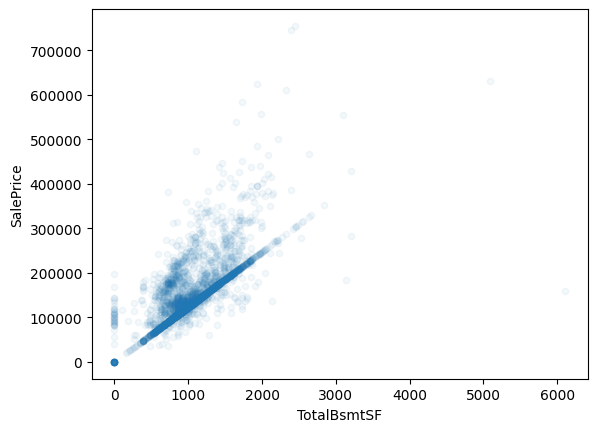

In [32]:
from pandas.plotting import scatter_matrix
housing.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.05)

# Trying out attribute cobinations

In [33]:
housing["LeftArea"]=housing['LotArea']-housing['TotalBsmtSF']

In [34]:
housing["LeftArea"]

0        7594.0
1        8338.0
2       10330.0
3        8794.0
4       13115.0
         ...   
2913     1390.0
2914     1348.0
2915    18776.0
2916     9529.0
2917     8631.0
Name: LeftArea, Length: 2918, dtype: float64

In [35]:
housing.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,LeftArea
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0,7594.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0,8338.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0,10330.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0,8794.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0,13115.0


<AxesSubplot: xlabel='LeftArea', ylabel='SalePrice'>

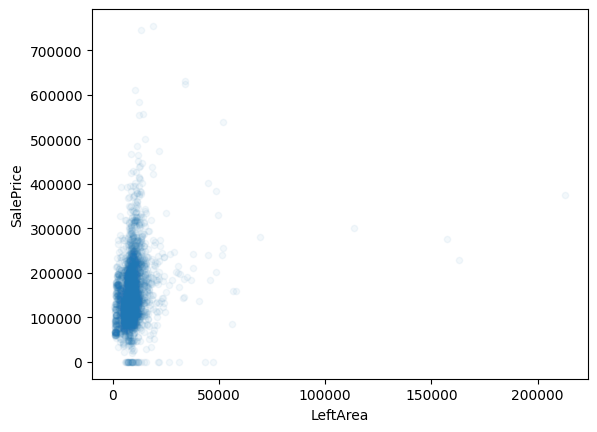

In [36]:
housing.plot(kind="scatter", x="LeftArea", y="SalePrice", alpha=0.05)

In [37]:
housing.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,LeftArea
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0,7594.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0,8338.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0,10330.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0,8794.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0,13115.0


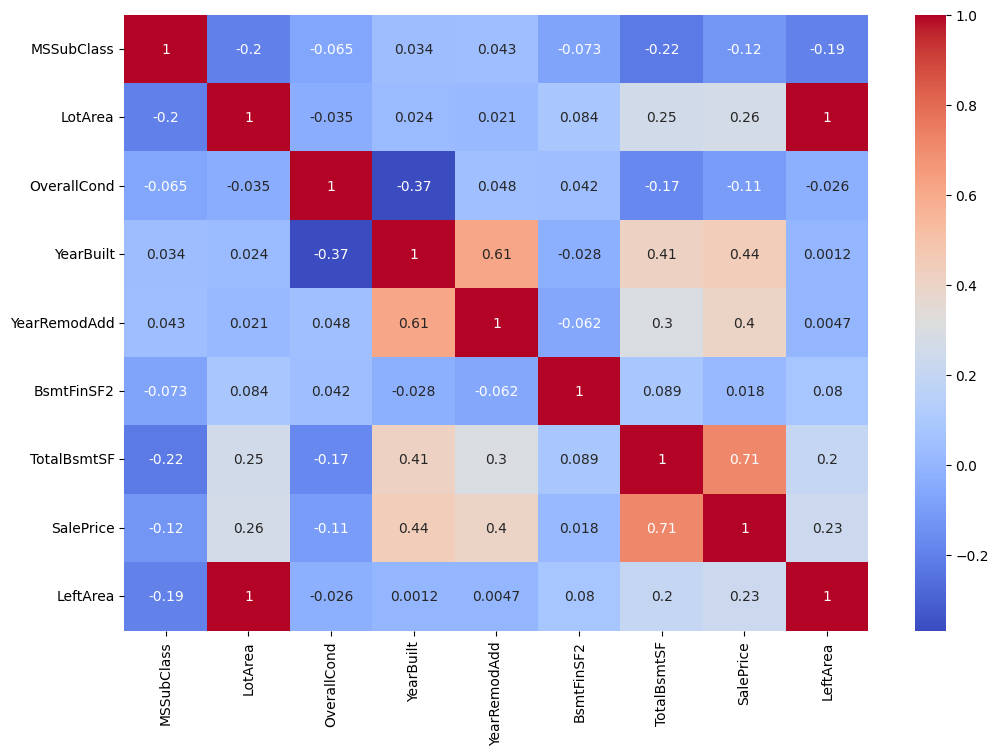

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
housing_numeric = housing.drop(columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'])

# Calculate correlation matrix
corr_matrix = housing_numeric.corr()

# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


array([[<AxesSubplot: xlabel='LotArea', ylabel='LotArea'>,
        <AxesSubplot: xlabel='OverallCond', ylabel='LotArea'>,
        <AxesSubplot: xlabel='TotalBsmtSF', ylabel='LotArea'>,
        <AxesSubplot: xlabel='LeftArea', ylabel='LotArea'>,
        <AxesSubplot: xlabel='SalePrice', ylabel='LotArea'>],
       [<AxesSubplot: xlabel='LotArea', ylabel='OverallCond'>,
        <AxesSubplot: xlabel='OverallCond', ylabel='OverallCond'>,
        <AxesSubplot: xlabel='TotalBsmtSF', ylabel='OverallCond'>,
        <AxesSubplot: xlabel='LeftArea', ylabel='OverallCond'>,
        <AxesSubplot: xlabel='SalePrice', ylabel='OverallCond'>],
       [<AxesSubplot: xlabel='LotArea', ylabel='TotalBsmtSF'>,
        <AxesSubplot: xlabel='OverallCond', ylabel='TotalBsmtSF'>,
        <AxesSubplot: xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
        <AxesSubplot: xlabel='LeftArea', ylabel='TotalBsmtSF'>,
        <AxesSubplot: xlabel='SalePrice', ylabel='TotalBsmtSF'>],
       [<AxesSubplot: xlabel='LotArea',

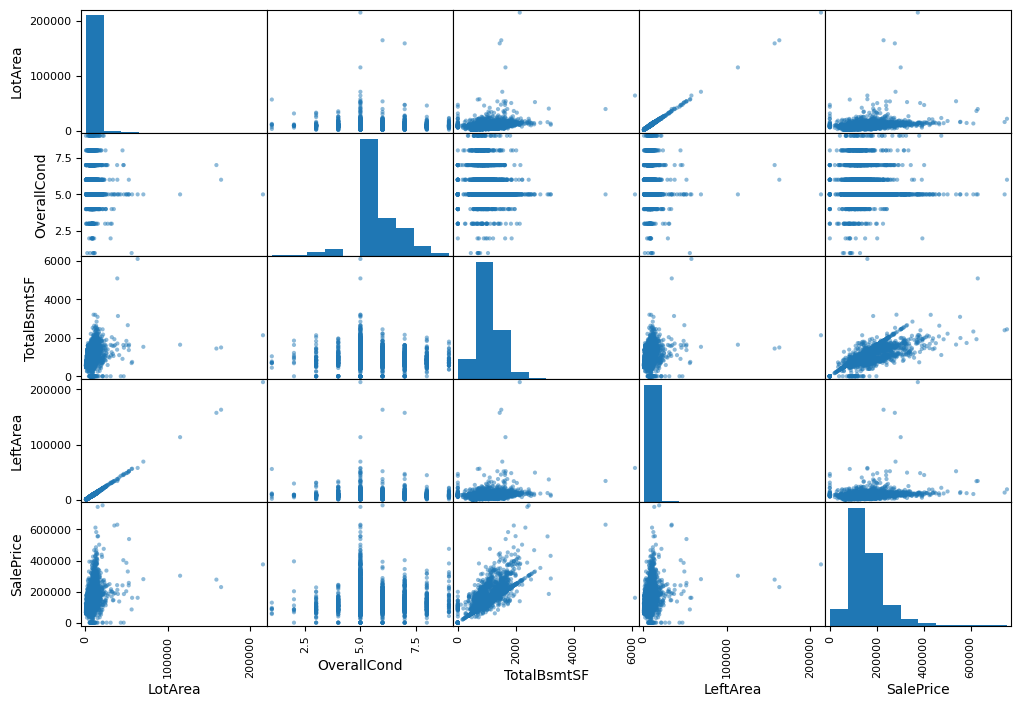

In [39]:
from pandas.plotting import scatter_matrix
attributes = ["LotArea", "OverallCond", "TotalBsmtSF", "LeftArea", "SalePrice"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

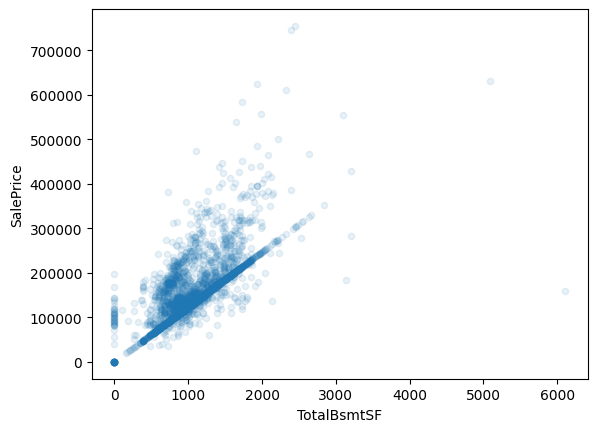

In [40]:
housing.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.1)

## Missing attributes

In [41]:
# To take care of missing attributes, we can do the following things
# 1. Get rid of missing data points
# 2. Get rid of whole attribute
# 3. Set some random value(0, mean as required)

In [42]:
#to drop a missing data 

a=housing.dropna(subset=["BsmtFinSF2"])
a.shape

(2918, 13)

In [43]:
#to dropa an entire column
# housing.drop(subset["BsmtFinSF2", axis=1])

In [44]:
median=housing["TotalBsmtSF"].median()

In [45]:
median

989.5

In [46]:
housing["TotalBsmtSF"].fillna(median)

0        856.0
1       1262.0
2        920.0
3        756.0
4       1145.0
         ...  
2913     546.0
2914     546.0
2915    1224.0
2916     912.0
2917     996.0
Name: TotalBsmtSF, Length: 2918, dtype: float64

In [47]:
housing.shape

(2918, 13)

In [48]:
mean=housing["TotalBsmtSF"].mean()

In [49]:
mean

1051.7775873886224

In [50]:
housing['TotalBsmtSF'].var()

194274.89429352595

In [51]:
housing.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,LeftArea
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0,7594.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0,8338.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0,10330.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0,8794.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0,13115.0


In [52]:
housing.describe() #before using imputer

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,LeftArea
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,57.150446,3.030158,10169.563057,3.055860,0.505826,5.564085,1971.321453,1984.276217,9.625771,49.582248,1051.777587,155201.557094,9117.785469
std,42.519354,0.662256,7887.959547,1.604747,1.206684,1.113004,30.293007,20.888290,3.200710,169.205611,440.766258,72934.776073,7787.620641
min,20.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,739.000000
25%,20.000000,3.000000,7482.000000,2.000000,0.000000,5.000000,1954.000000,1965.000000,8.000000,0.000000,793.000000,110000.000000,6516.500000
50%,50.000000,3.000000,9455.000000,4.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,989.500000,141682.300000,8400.000000
75%,70.000000,3.000000,11573.500000,4.000000,0.000000,6.000000,2001.000000,2004.000000,12.000000,0.000000,1302.000000,187400.000000,10382.000000
max,190.000000,5.000000,215245.000000,4.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,6110.000000,755000.000000,213109.000000


In [53]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_.shape

(13,)

In [55]:
X=imputer.transform(housing)

In [56]:
housing_tr=pd.DataFrame(X, columns=housing.columns)

In [57]:
housing_tr.describe()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,LeftArea
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,57.150446,3.030158,10169.563057,3.055860,0.505826,5.564085,1971.321453,1984.276217,9.625771,49.582248,1051.777587,155201.557094,9117.785469
std,42.519354,0.662256,7887.959547,1.604747,1.206684,1.113004,30.293007,20.888290,3.200710,169.205611,440.766258,72934.776073,7787.620641
min,20.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,739.000000
25%,20.000000,3.000000,7482.000000,2.000000,0.000000,5.000000,1954.000000,1965.000000,8.000000,0.000000,793.000000,110000.000000,6516.500000
50%,50.000000,3.000000,9455.000000,4.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,989.500000,141682.300000,8400.000000
75%,70.000000,3.000000,11573.500000,4.000000,0.000000,6.000000,2001.000000,2004.000000,12.000000,0.000000,1302.000000,187400.000000,10382.000000
max,190.000000,5.000000,215245.000000,4.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,6110.000000,755000.000000,213109.000000


In [58]:
housing =strat_train_set.drop("SalePrice", axis=1)
housing_labels=strat_train_set["SalePrice"].copy()

# Feature Scaling 

There are of two types
1. Min-Max Scaling (Normalization)
(value-min)/(max-min)    
2. Standardization
(value-mean)/std    

# Creating pipeline

In [59]:
from sklearn.pipeline import Pipeline


In [60]:
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [61]:
housing_num_tr=my_pipeline.fit_transform(housing)
#we are using the transformed data set for further processing


In [62]:
housing_num_tr.shape

(2334, 11)

In [63]:
from joblib import dump, load
dump(my_pipeline, 'pipeline.joblib')

['pipeline.joblib']

## Selecting  a desired model

In [64]:
housing_labels.head()

294     167000.00
2859    145518.24
1525    122255.12
2440    119656.58
906     255000.00
Name: SalePrice, dtype: float64

In [65]:
num_nan = housing_labels.isnull().sum().sum()
print("Number of NaN values:", num_nan)

Number of NaN values: 0


In [66]:
median_value = housing_labels.median()
housing_labels.fillna(median_value, inplace=True)

In [67]:
housing_labels.head()

294     167000.00
2859    145518.24
1525    122255.12
2440    119656.58
906     255000.00
Name: SalePrice, dtype: float64

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=DecisionTreeRegressor()
# model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [117]:
some_data=housing.iloc[:5]

In [118]:
some_labels=housing_labels.iloc[:5]

In [119]:
prepare_data=my_pipeline.transform(some_data)

In [120]:
model.predict(prepare_data)

array([162413.0188, 145087.1626, 127074.9852, 117362.815 , 253716.9024])

In [121]:
list(some_labels)

[167000.0, 145518.24, 122255.12, 119656.58, 255000.0]

# Evaluating The model

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [124]:
mse

299919100.1676649

In [125]:
rmse

17318.17254122573

# Using better evaluation Tech

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [128]:
rmse_scores

array([49123.69685405, 44266.96354865, 49843.44100732, 48453.14076768,
       45972.79576128, 39876.6919278 , 43726.14711968, 48802.0444447 ,
       47653.16830171, 41297.55702952])

In [129]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [130]:
print_scores(rmse_scores)

Scores: [49123.69685405 44266.96354865 49843.44100732 48453.14076768
 45972.79576128 39876.6919278  43726.14711968 48802.0444447
 47653.16830171 41297.55702952]
Mean: 45901.56467624025
Standard deviation: 3298.747910712971


In [131]:
# Prepare the data
housing = strat_train_set.drop("SalePrice", axis=1)
housing_labels = strat_train_set["SalePrice"].copy()
housing_prepared = my_pipeline.transform(housing)

# Train the model
model.fit(housing_prepared, housing_labels)

# Make predictions on the training set
housing_predictions = model.predict(housing_prepared)

# Calculate the RMSE of the entire training set
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("RMSE of the entire training set:", rmse)

# Calculate the accuracy percentage of the prediction
accuracy_percent = (1 - (rmse / housing_labels.mean())) * 100
print("Accuracy percentage of the prediction:", accuracy_percent)


RMSE of the entire training set: 17533.96966342406
Accuracy percentage of the prediction: 88.68436270440284


In [132]:
input_data = {
    'MSSubClass': [60],
    'MSZoning': [1],
    'LotArea': [10000],
    'LotConfig': [1],
    'BldgType': [1],
    'OverallCond': [5],
    'YearBuilt': [2003],
    'YearRemodAdd': [2003],
    'Exterior1st': [1],
    'BsmtFinSF2': [0],
    'TotalBsmtSF': [2000]
}


In [133]:
prepared_input_data = my_pipeline.transform(pd.DataFrame(input_data))
predicted_price = model.predict(prepared_input_data)
print(predicted_price)

[297041.0316]


# Saving the Model

In [134]:
from joblib import dump, load
dump(model, 'HousePricePrediction.joblib')

['HousePricePrediction.joblib']

# Testing the model on test data

In [135]:
median_value = strat_test_set.median()
strat_test_set.fillna(median_value, inplace=True)

In [136]:
X_test= strat_test_set.drop("SalePrice", axis=1)
Y_test=strat_test_set["SalePrice"].copy()
X_test_prepared=my_pipeline.transform(X_test)

final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [137]:
final_rmse

47932.620438588754

In [138]:
# Calculate absolute error
abs_error = np.abs(Y_test - final_predictions)

# Calculate percentage error
percentage_error = abs_error / Y_test

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(percentage_error) * 100
print(mape)

accuracy_percent_test=(1-(final_rmse/housing_labels.mean()))*100
print(accuracy_percent_test)

inf
69.0664374398901


In [139]:
prepare_data[0]

array([-0.88714873, -0.0721484 , -0.07372322,  0.60059139, -0.42159524,
       -0.50877786, -0.59940498, -1.49472522, -1.15810891, -0.29079053,
        0.85491692])